## Задание


### Практический кейс
### «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

В качестве исходных данных были взяты результаты экспериментальных
исследований, проводимых в целях улучшения технологического процесса
электронно-лучевой сварки изделия, сборка которого состоит из элементов,
состоящих из разнородного материала.
Установка электронно-лучевой сварки, на которой проводились
исследования, предназначена для сварки электронным лучом в глубоком вакууме
деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых
и специальных сплавов.
Существующая установка электронно-лучевой сварки обеспечивает
повторяемость режимов в рамках возможностей реализованной системы
управления. Работы по сварке выполнялись на образцах-имитаторах,
соответствующих технологическому изделию.
Для уменьшения вложения энергии при сварке:
1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической
системы (FP).
По совокупности параметров технологических режимов обеспечивались
минимально возможные размеры сварных швов: глубина шва (Depth) и ширина
шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка
18-ти единиц образцов. Результаты металлографического контроля
по размерам сварного шва для каждого образца проводились в 4-х поперечных
сечениях сварного шва. Ускоряющее напряжение было постоянным в диапазоне
19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки,
размеров сварочных швов в поперечных сечениях всех образцов. Статистические
показатели набора обучающих данных указаны в табл. 1.

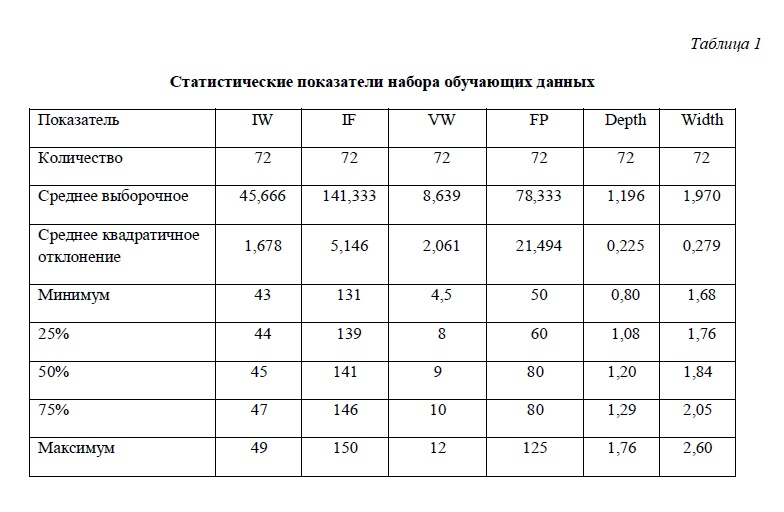

**Задача:**
Решить задачу регрессии (одним или несколькими методами)
для предсказания глубины и ширины сварного соединения, выполнив
необходимые этапы (разведочный анализ, предобработка)

## Подготовка окружения

### Импорт библиотек

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pickle

### Настройка графиков

In [ ]:
sns.set(rc = {'figure.figsize': (45, 20)})
sns.set_theme(style = 'white', palette = None)
sns.set_context('talk')

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = None

### Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns',100) # чтобы было видно все столбцы нашего датасета
pd.set_option('display.max_rows',100) # чтобы было видно все строки нашего датасета

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BMSTU/ebw_data.csv') # загружаем датасет

In [ ]:
df.head(5) #смотрим, что все загрузилось и отображаем 5 первых строк

,IW,IF,VW,FP,Depth,Width
0,47,139,4.50,80,1.60,2.54
1,47,139,4.50,80,1.62,2.50
2,47,139,4.50,80,1.68,2.60
3,47,139,4.50,80,1.58,2.52
4,45,140,4.50,80,1.76,2.48


In [ ]:
df #отобразим весь набор данных

,IW,IF,VW,FP,Depth,Width
0,47,139,4.50,80,1.60,2.54
1,47,139,4.50,80,1.62,2.50
2,47,139,4.50,80,1.68,2.60
3,47,139,4.50,80,1.58,2.52
4,45,140,4.50,80,1.76,2.48
5,45,140,4.50,80,1.72,2.48
6,45,140,4.50,80,1.64,2.52
7,45,140,4.50,80,1.64,2.56
8,45,140,8.00,80,1.20,2.00
9,45,140,8.00,80,1.20,1.96


## Разведочный анализ данных

#### Посмотрим размерность нашего датасета

In [ ]:
df.shape

(72, 6)

Датасет достаточно небольшой

#### Посмотрим базовую информацию о наборе данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
print ('Набор данных состоит из:')
print (df.shape[0], 'строк')
print (df.shape[1], 'столбцов:')
i=0
for name in df.columns:
    if i==0:
        print ('          ',name)
    else:
        print ('          ',name)
    i+=1
print ('Содержит типы переменных:')
df.dtypes

Набор данных состоит из:
72 строк
6 столбцов:
           IW
           IF
           VW
           FP
           Depth
           Width
Содержит типы переменных:


IW         int64
IF         int64
VW       float64
FP         int64
Depth    float64
Width    float64
dtype: object

#### Проверим набор данные на пропуски

In [ ]:
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

IW - 0%
IF - 0%
VW - 0%
FP - 0%
Depth - 0%
Width - 0%


***Пропусков нет***

#### Посмотрим на датасет визуально

<Axes: >

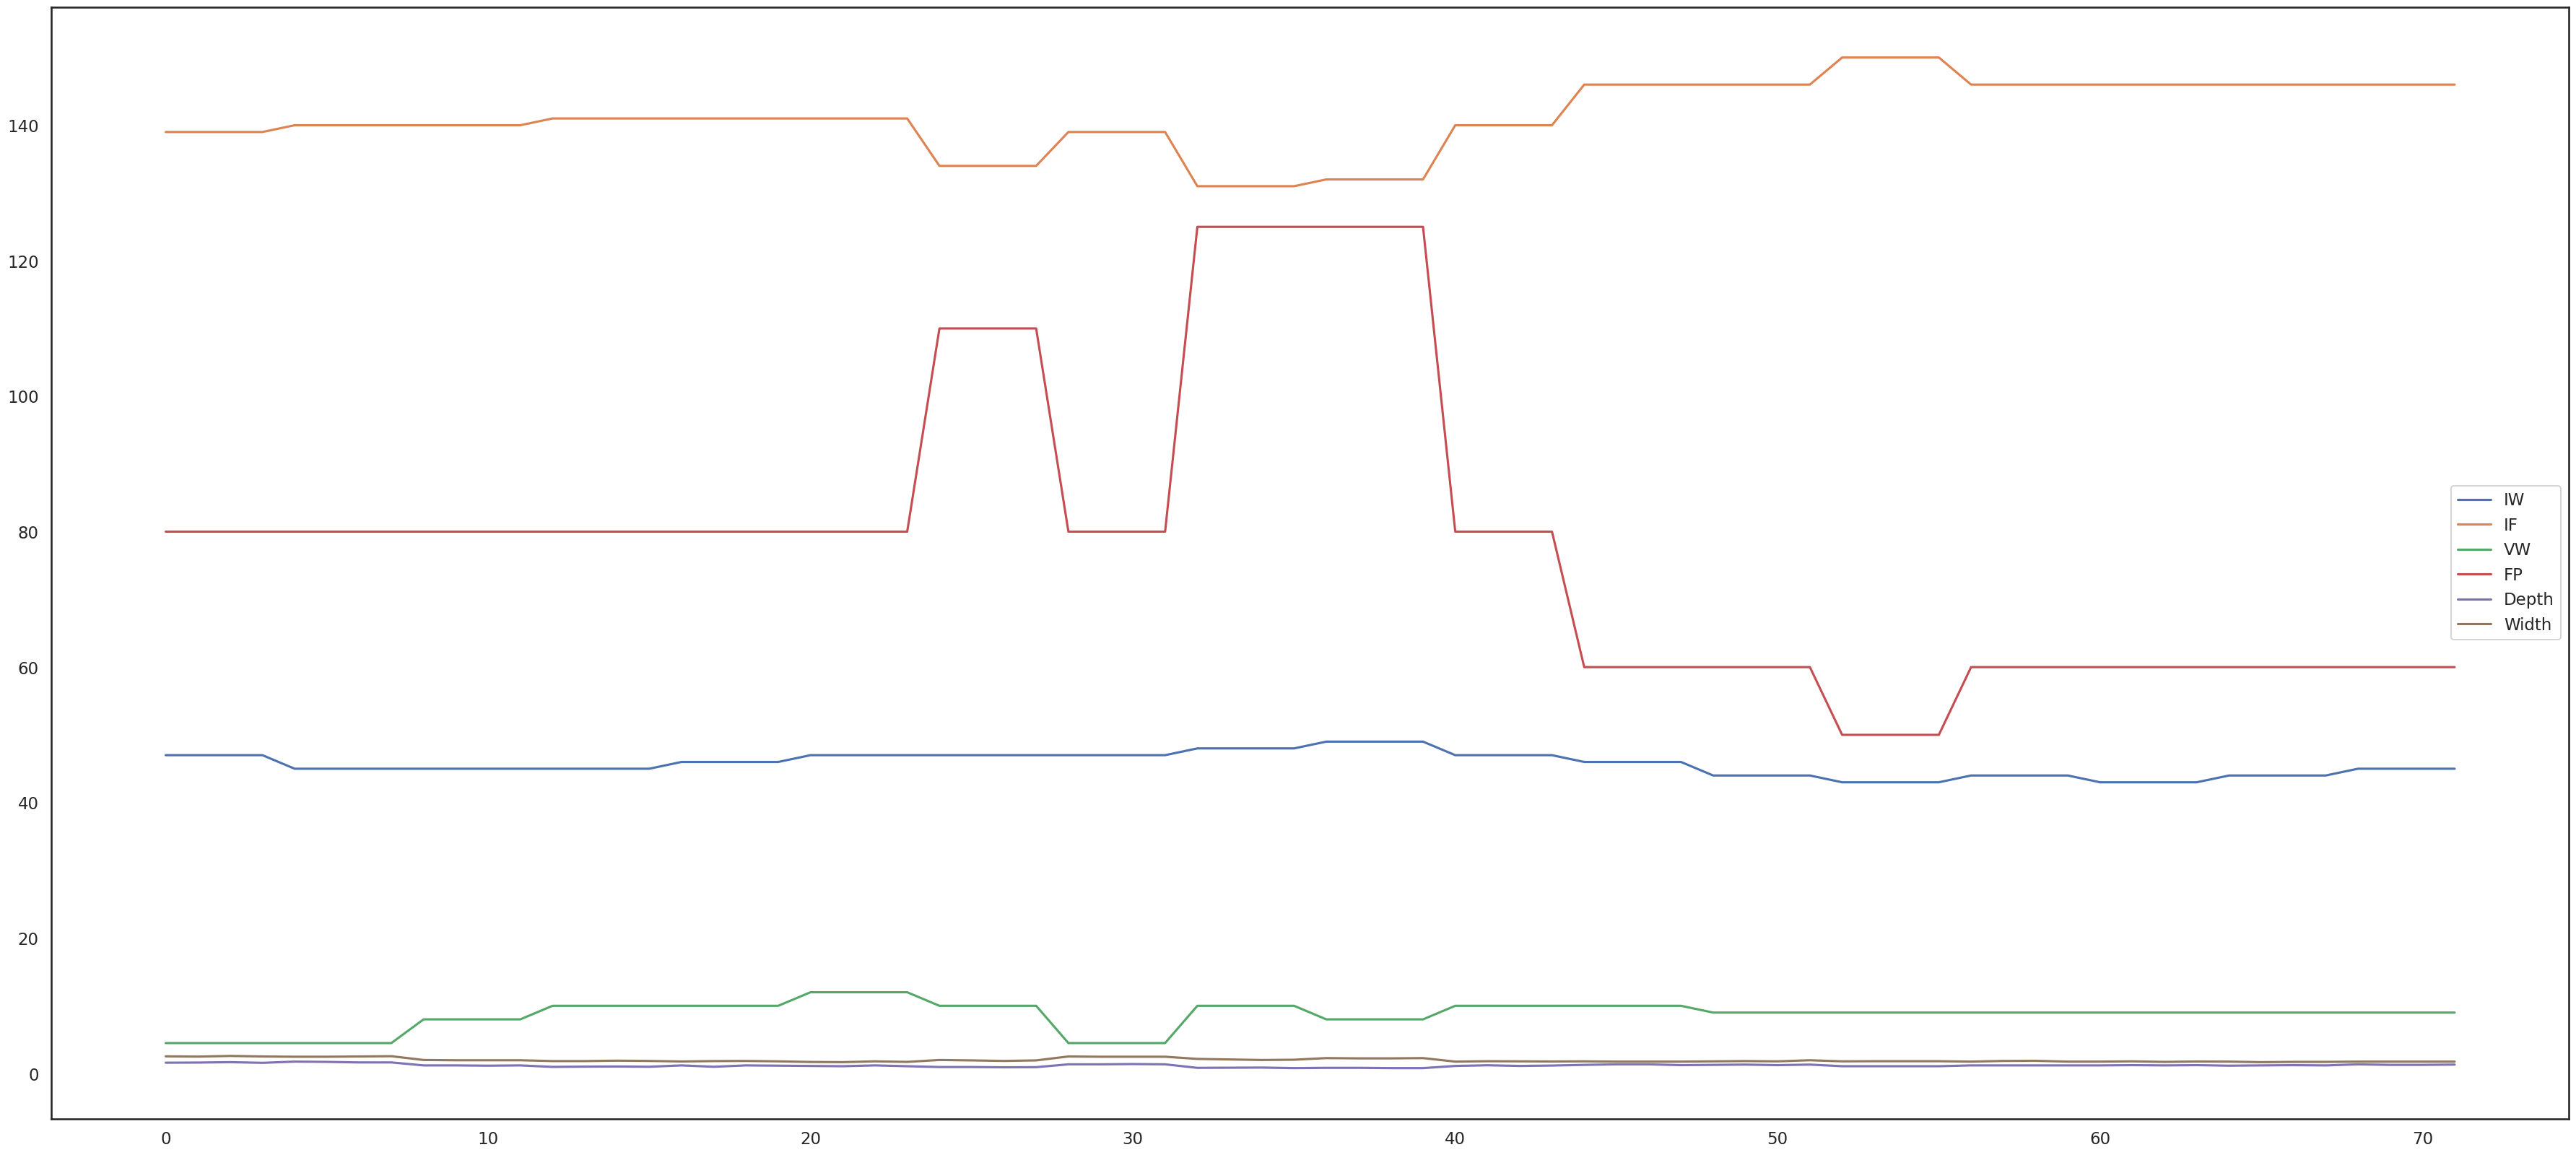

In [ ]:
df.plot.line()

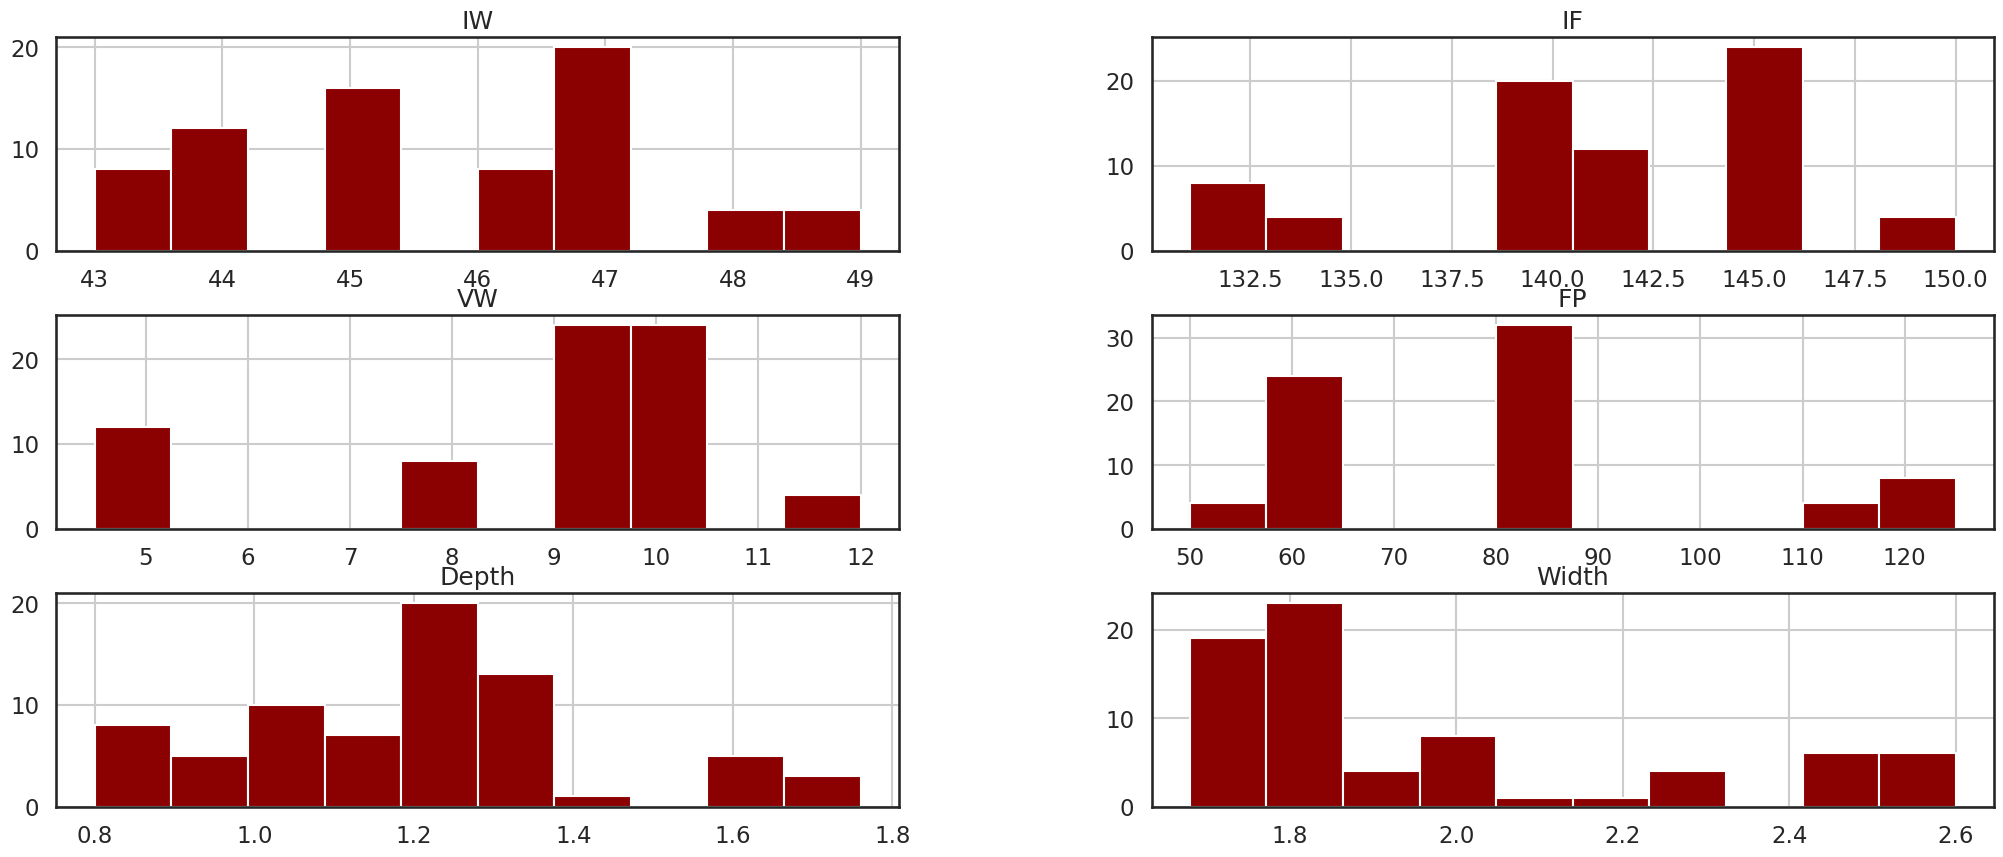

In [ ]:
df.hist(figsize = (25,10), bins = 10, color = 'darkred')
plt.show()

##### Построим гистограмму распределения с визуальной кривой

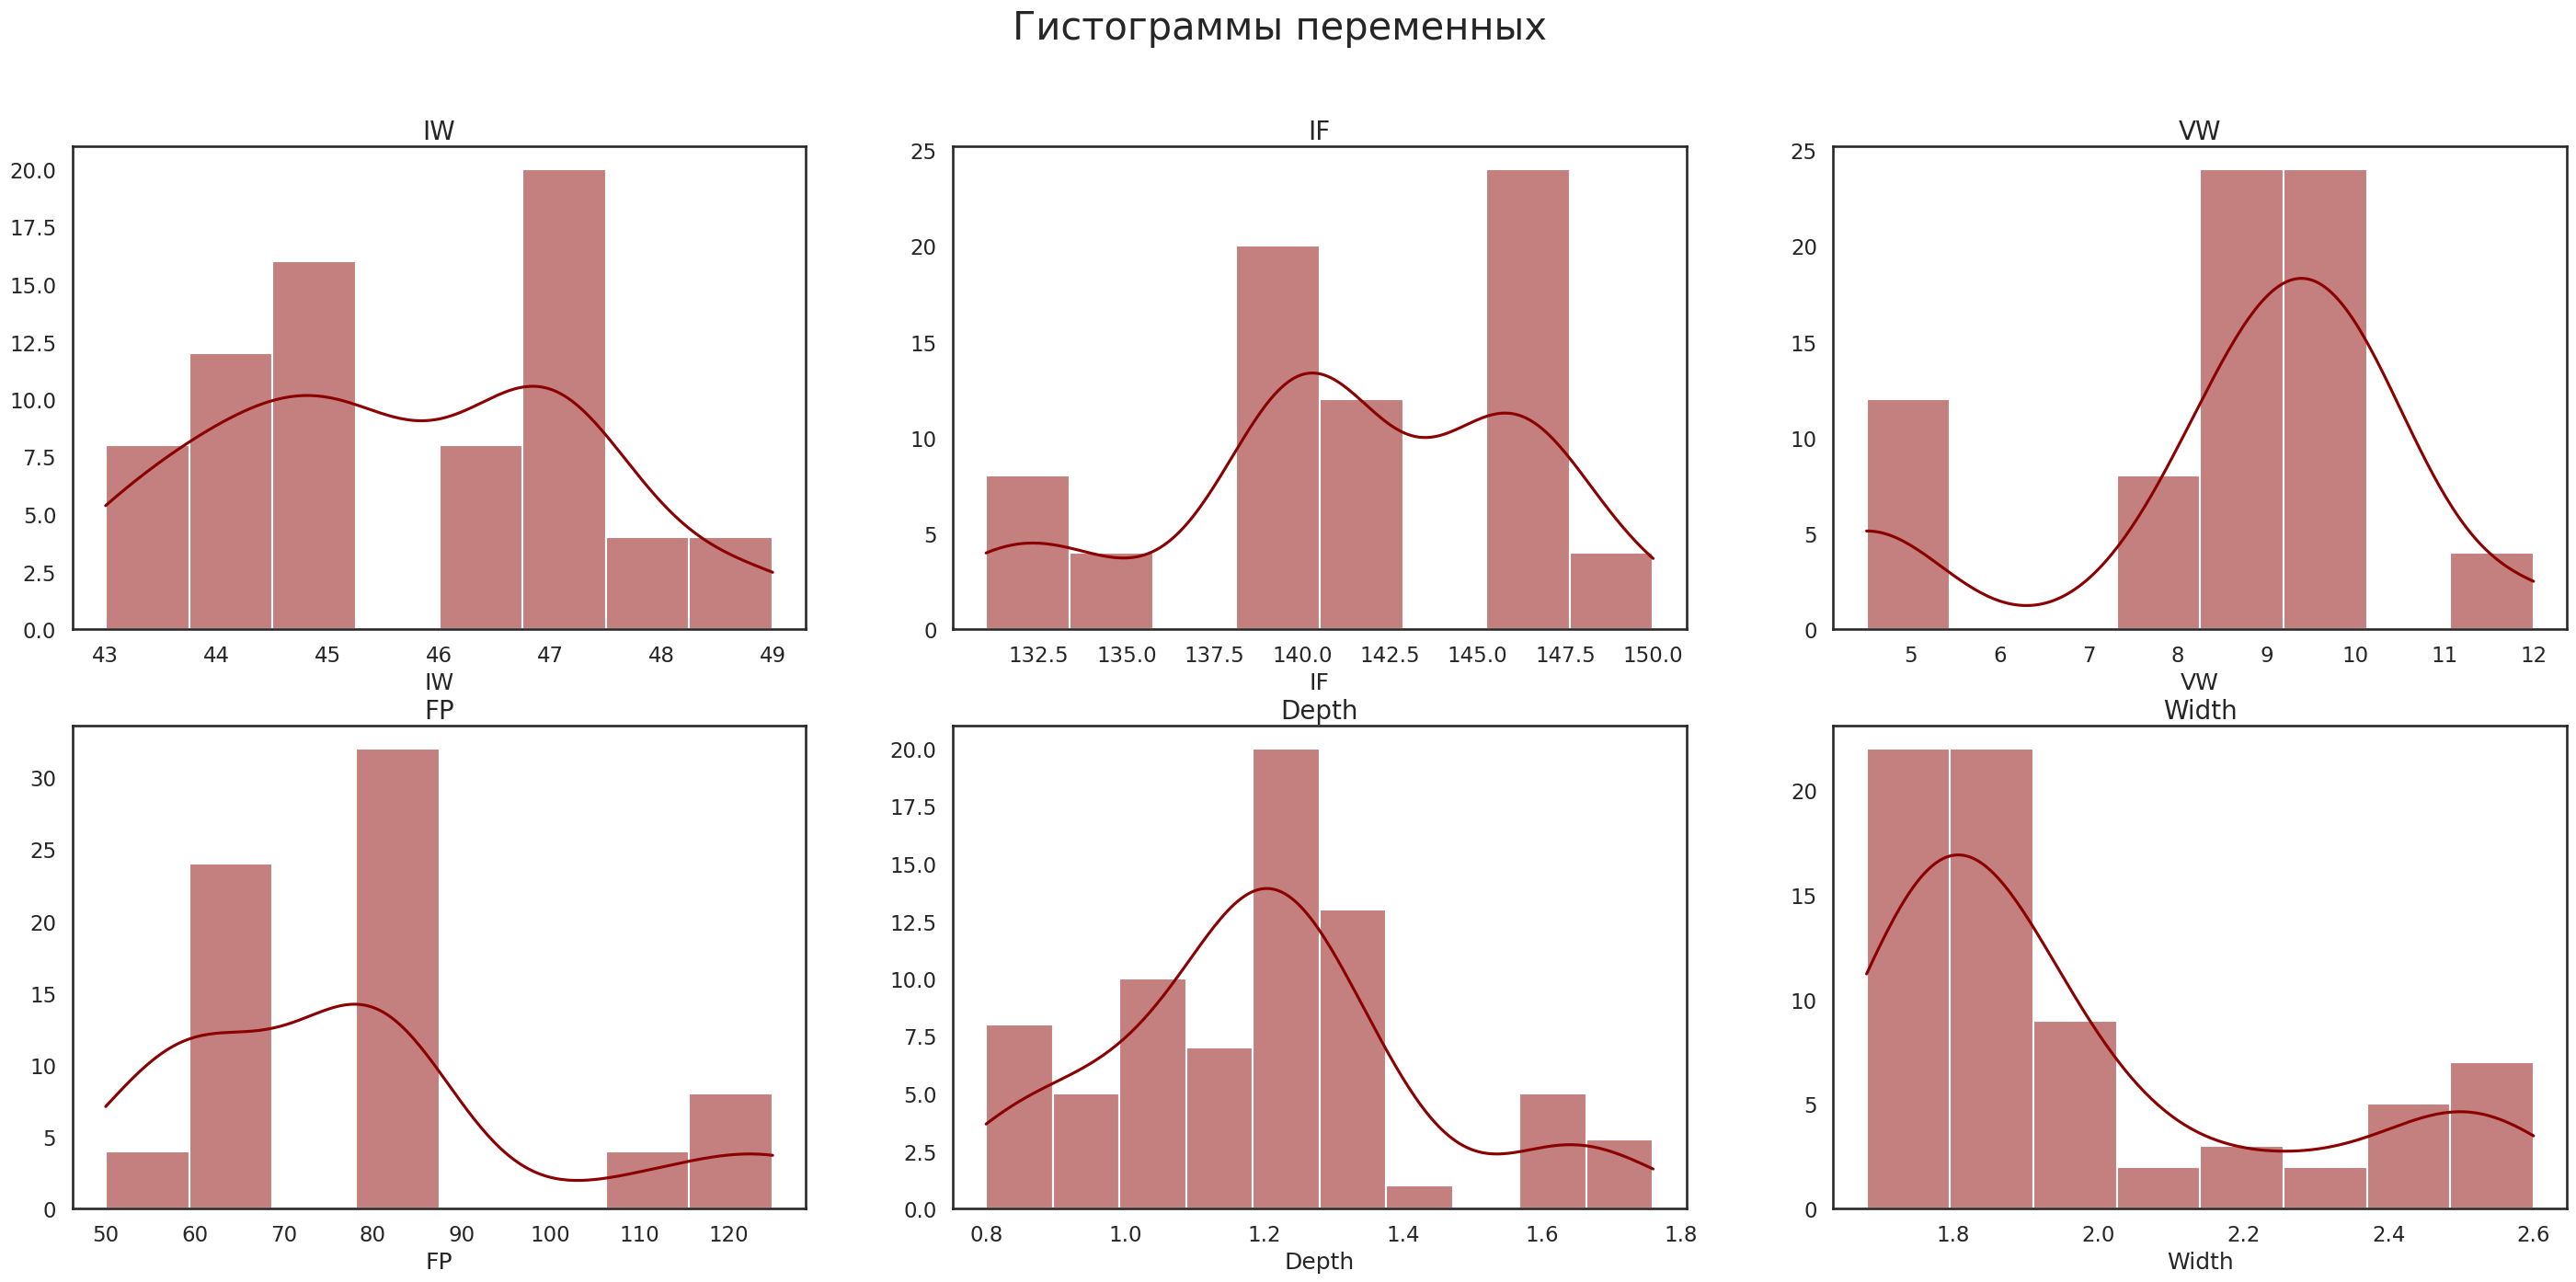

In [ ]:
stroki = 2 # количество строк
stolb = 3 # количество столбцов
counter = 1

plt.figure(figsize = (35,15))
plt.suptitle('Гистограммы переменных', fontsize = 30)

for col in df.columns:
    plt.subplot(stroki, stolb, counter)
    sns.histplot(data = df[col], kde = True, color = "darkred")
    plt.ylabel(None)
    plt.title(col, size = 20)
    counter += 1

#### Предварительные выводы

Согласно заданию: IW; IF; VW; FP - это входные параметры, а целевые параметры - Depth и Width.
Датасет состоит из 72 строк, 6 столбцов, содержит переменные типа float64 и int64 (целые числа или числа с плавающей точкой).
Набор данных качественных характеристик или категориальных признаков не имеет. Следовательно, применять кодирование не нужно.

Предварительная обработка позволяет нам приводить данные в подходящий вид. Например, очищать данные и удалять любые несоответствия, находить выбросы, неточные или пропущенные записи, устранять нулевые значения, работать с повторяющимися значениями и т.д.

В нашем наборе данных нет ни одной записи NaN, по этому признаку очистка или замена не требуется.
По остальным признакам проверим далее.

#### Посмотрим описательную статистику

In [ ]:
df.describe()

,IW,IF,VW,FP,Depth,Width
count,72.00,72.00,72.00,72.00,72.00,72.00
mean,45.67,141.33,8.64,78.33,1.20,1.97
std,1.68,5.15,2.06,21.49,0.23,0.28
min,43.00,131.00,4.50,50.00,0.80,1.68
25%,44.00,139.00,8.00,60.00,1.08,1.76
50%,45.50,141.00,9.00,80.00,1.20,1.84
75%,47.00,146.00,10.00,80.00,1.29,2.05
max,49.00,150.00,12.00,125.00,1.76,2.60


Как мы можем видеть из таблицы, значения столбца "IW" имеют небольшой разброс, остальные столбцы чуть больше, но тоже не критично.

In [ ]:
df.describe().round(2).T # выведем описательную статистику в более удобном формате

,count,mean,std,min,25%,50%,75%,max
IW,72.00,45.67,1.68,43.00,44.00,45.50,47.00,49.00
IF,72.00,141.33,5.15,131.00,139.00,141.00,146.00,150.00
VW,72.00,8.64,2.06,4.50,8.00,9.00,10.00,12.00
FP,72.00,78.33,21.49,50.00,60.00,80.00,80.00,125.00
Depth,72.00,1.20,0.23,0.80,1.08,1.20,1.29,1.76
Width,72.00,1.97,0.28,1.68,1.76,1.84,2.05,2.60


Большого разброса между максимальными и минимальными данными по всем столбцам не выявлено

#### Проанализируем уникальные значения в столбцах

In [ ]:
print('Уникальных значений в наборе данных:')
for n in df.columns:
    print(n, '-',df[n].unique().size)

Уникальных значений в наборе данных:
IW - 7
IF - 8
VW - 5
FP - 5
Depth - 29
Width - 25


#### Проверим датасет на дубликаты

In [ ]:
df.duplicated().sum()
print('Найдено', len(df) - len(df.drop_duplicates()), 'дубликатов')

Найдено 7 дубликатов


In [ ]:
df[df.duplicated()]

,IW,IF,VW,FP,Depth,Width
11,45,140,8.00,80,1.20,1.96
31,47,139,4.50,80,1.36,2.48
46,46,146,10.00,60,1.36,1.76
54,43,150,9.00,50,1.08,1.82
55,43,150,9.00,50,1.08,1.82
59,44,146,9.00,60,1.20,1.76
70,45,146,9.00,60,1.28,1.76


7 строк дубликатов составят почти 10% нашего датасета, таким образом удалять их нецелесообразно из-за потери данных

In [ ]:
# df_dub = df.drop_duplicates()
# df_dub.duplicated().sum()

# df_dub.shape

#### Проверим датасет на выбросы

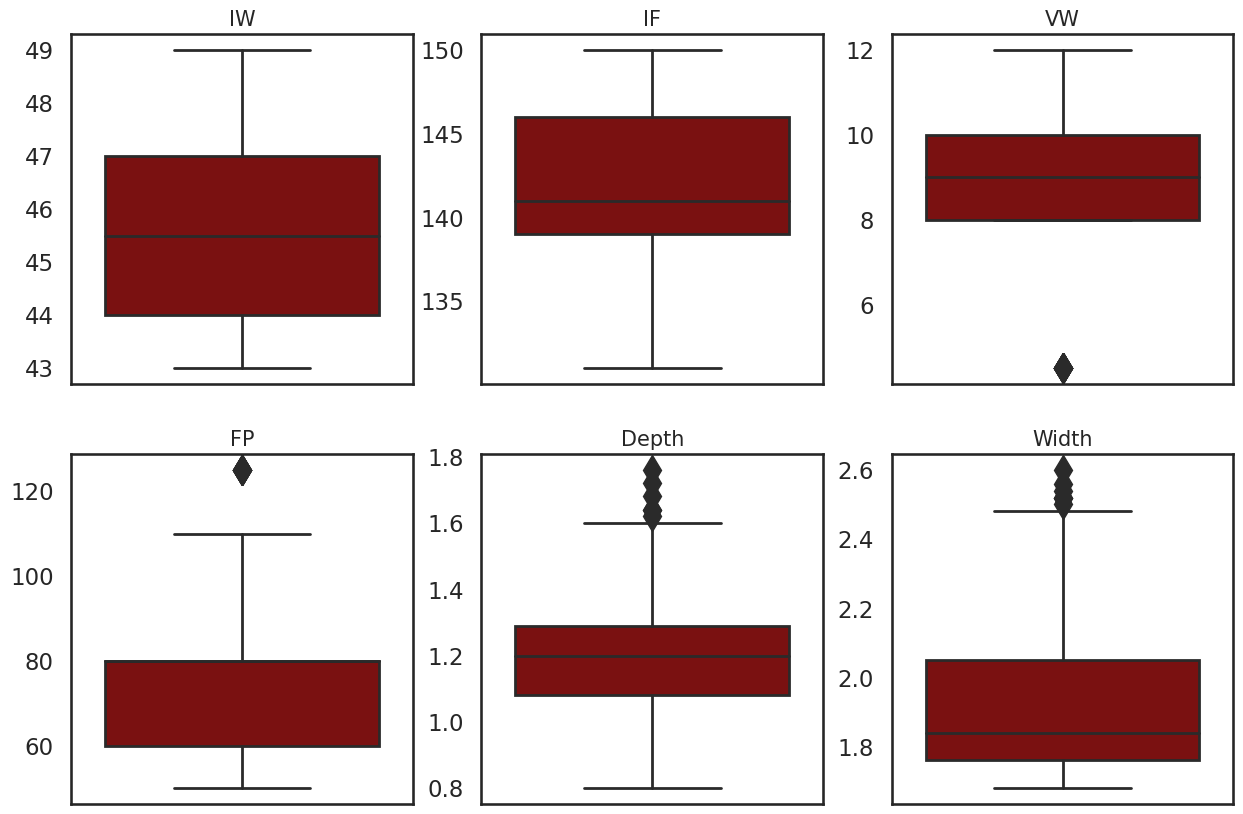

In [ ]:
counter = 1

plt.figure(figsize = (15,10))

for col in df.columns:
    plt.subplot(stroki, stolb, counter)
    sns.boxplot(data = df, y = df[col], fliersize = 15, linewidth = 2, color = 'darkred')
    plt.ylabel(None)
    plt.title(col, size = 15)
    counter += 1

***Наибольшее количество выбросов в столбцах Width и Depth***

#### Рассмотрим корреляцию параметров

<Axes: >

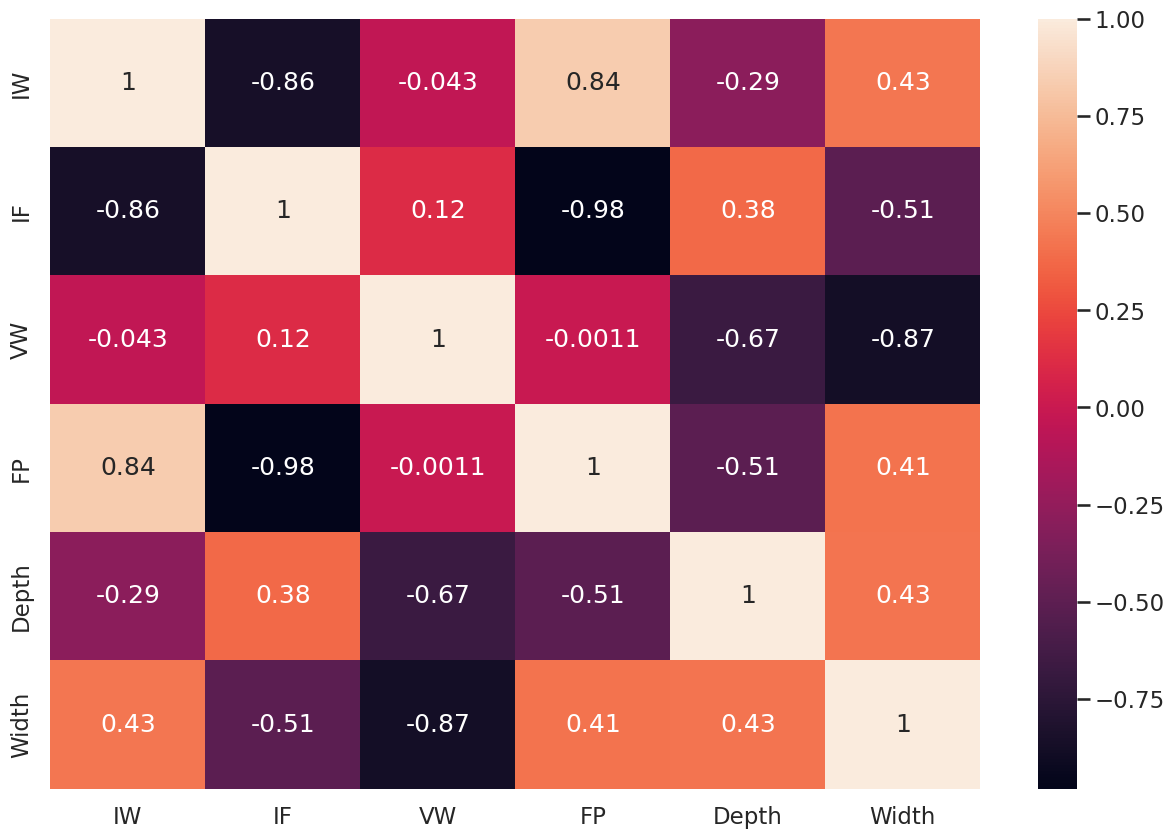

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot=True)

Самая высокая отрицательная корреляция наблюдается между "Менялось расстояние от поверхности образцов до электронно-оптической системы (FP)" и "Увеличивался ток фокусировки электронного пучка (IF)". Она равна -0.98

Хорошая корреляция между переметрами "Менялось расстояние от поверхности образцов до электронно-оптической системы (FP)" и "Снижалась величина сварочного тока (IW)". Корреляция между этими двуми параметрами тоже очень близка к единице и равна 0.84, но со знаком плюс.

Параметры "Увеличивался ток фокусировки электронного пучка (IF)" и "Снижалась величина сварочного тока (IW)" так же связаны между собой корреляцией -0.86

И самый важная для нас связь параметров - это связь между "Увеличивалась скорость сварки (VW)" и "Ширина шва (Width)". Она равна - 0.87. Т.е. чем быстрее проихводили сварку, тем шире был шов. Что закономерно: чем аккуретнее делается шов, тем больше это занимает времени. Но это нужно уточнить у экспертов в данном виде сварочных швов дополнительно. Параметры "Ширина шва (Width)" и "Снижалась величина сварочного тока (IW)" показывают нам умеренную зависимость, а зависимость от "Увеличивался ток фокусировки электронного пучка (IF)" как раз-таки обратная.

У сожалению, на тепловой карте корреляции закономерности, связанных со вторым, очень нужным нам переметром - это глубиной шва ("Depth") немного ниже, но тем не менее есть обратная зависимость от параметра "Увеличивалась скорость сварки (VW)"и "Менялось расстояние от поверхности образцов до электронно-оптической системы (FP)".

## Нормализация и стандартизация данных

#### Создадим копию изначального датасета

In [ ]:
df_normaliz = df.copy()

In [ ]:
df_normaliz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


#### Нормализуем данные

In [ ]:
scaler = sklearn.preprocessing.MinMaxScaler()
df_normaliz = pd.DataFrame(scaler.fit_transform(df_normaliz), columns = df_normaliz.columns, index = df_normaliz.index)

df_minmax_n = pd.DataFrame(df_normaliz, columns = df_normaliz.columns,)
df_minmax_n.describe()

,IW,IF,VW,FP,Depth,Width
count,72.00,72.00,72.00,72.00,72.00,72.00
mean,0.44,0.54,0.55,0.38,0.41,0.32
std,0.28,0.27,0.27,0.29,0.23,0.30
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.17,0.42,0.47,0.13,0.29,0.09
50%,0.42,0.53,0.60,0.40,0.42,0.17
75%,0.67,0.79,0.73,0.40,0.51,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00


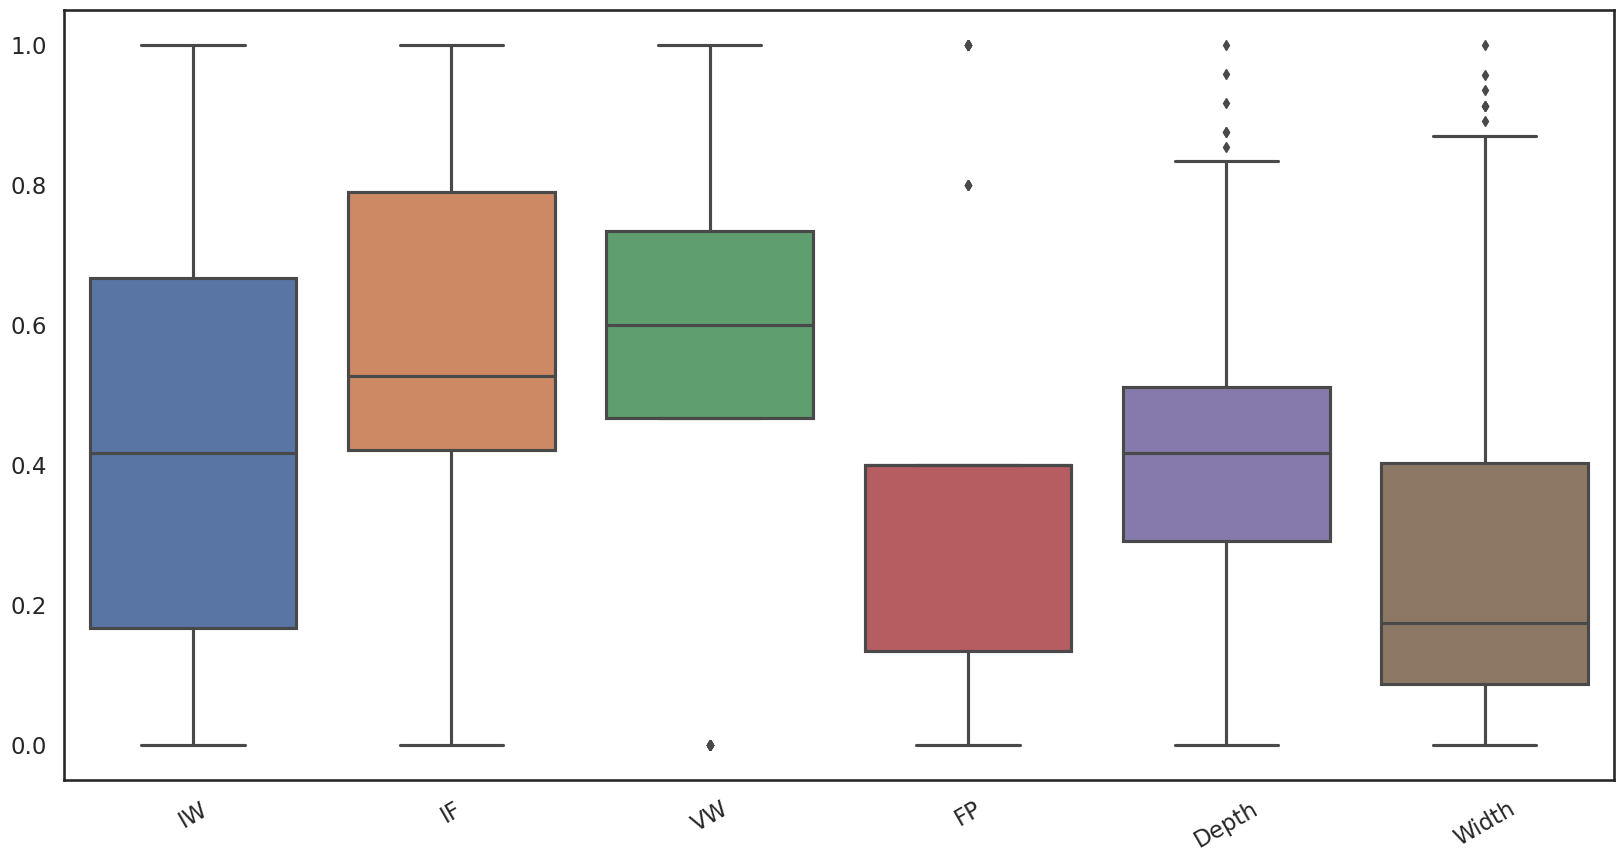

In [ ]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data = df_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);

<Axes: ylabel='Density'>

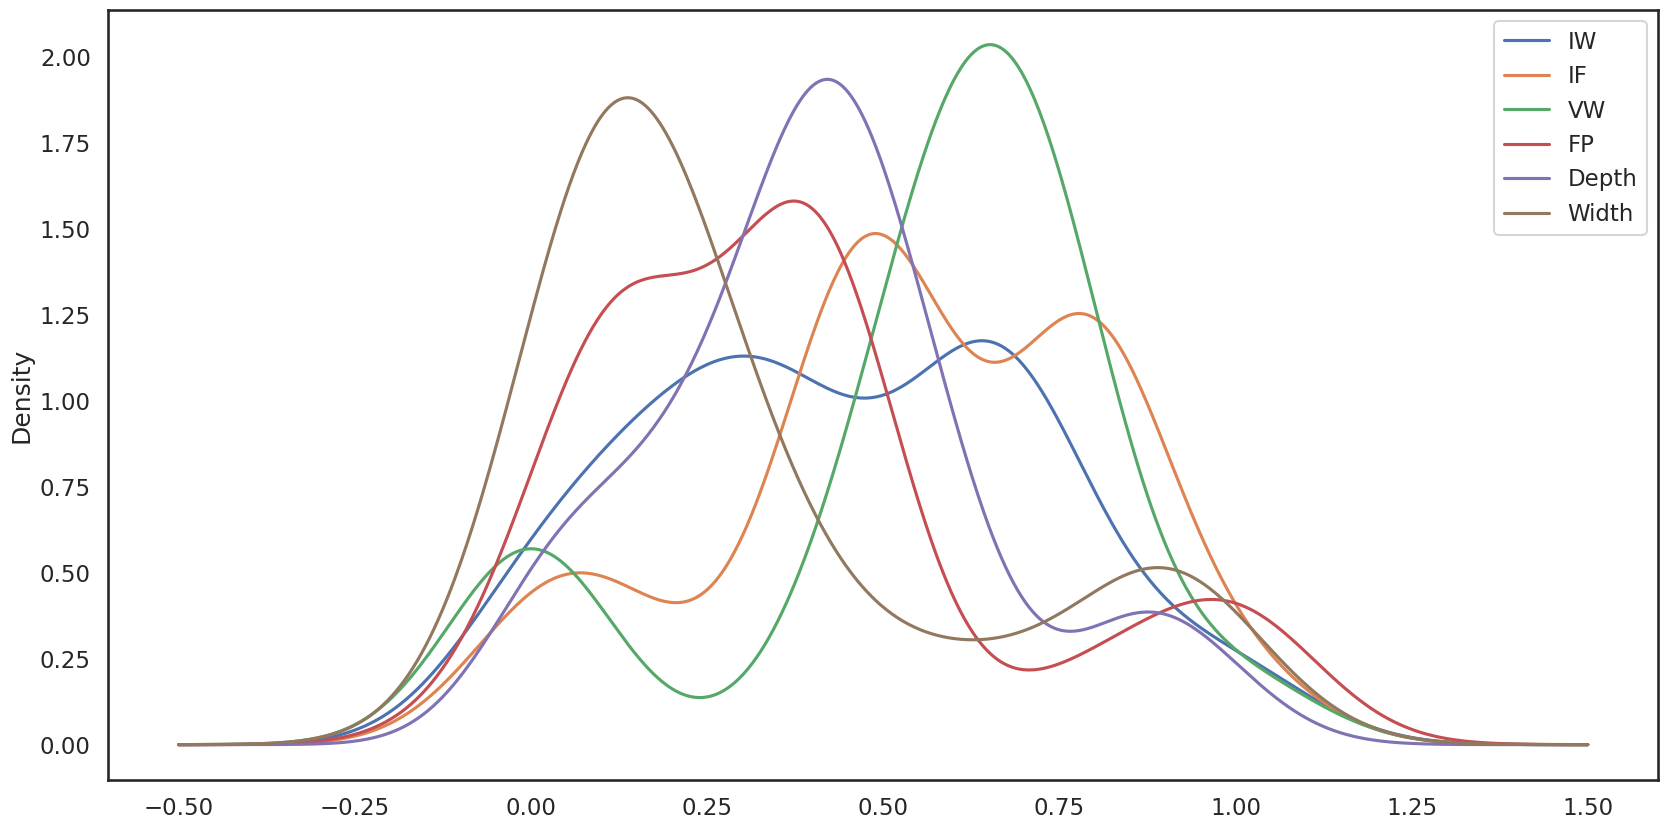

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
df_minmax_n.plot(kind = 'kde', ax = ax)

***Распределение в целом близко к нормальному***

#### Стандартизируем данные

In [ ]:
X1 = df_minmax_n.copy()

In [ ]:
df_std_X1 = sklearn.preprocessing.StandardScaler().fit(X1)
df_standart_X1 = df_std_X1.transform(X1)
df_standart_1 = pd.DataFrame(df_standart_X1)

<Axes: ylabel='Density'>

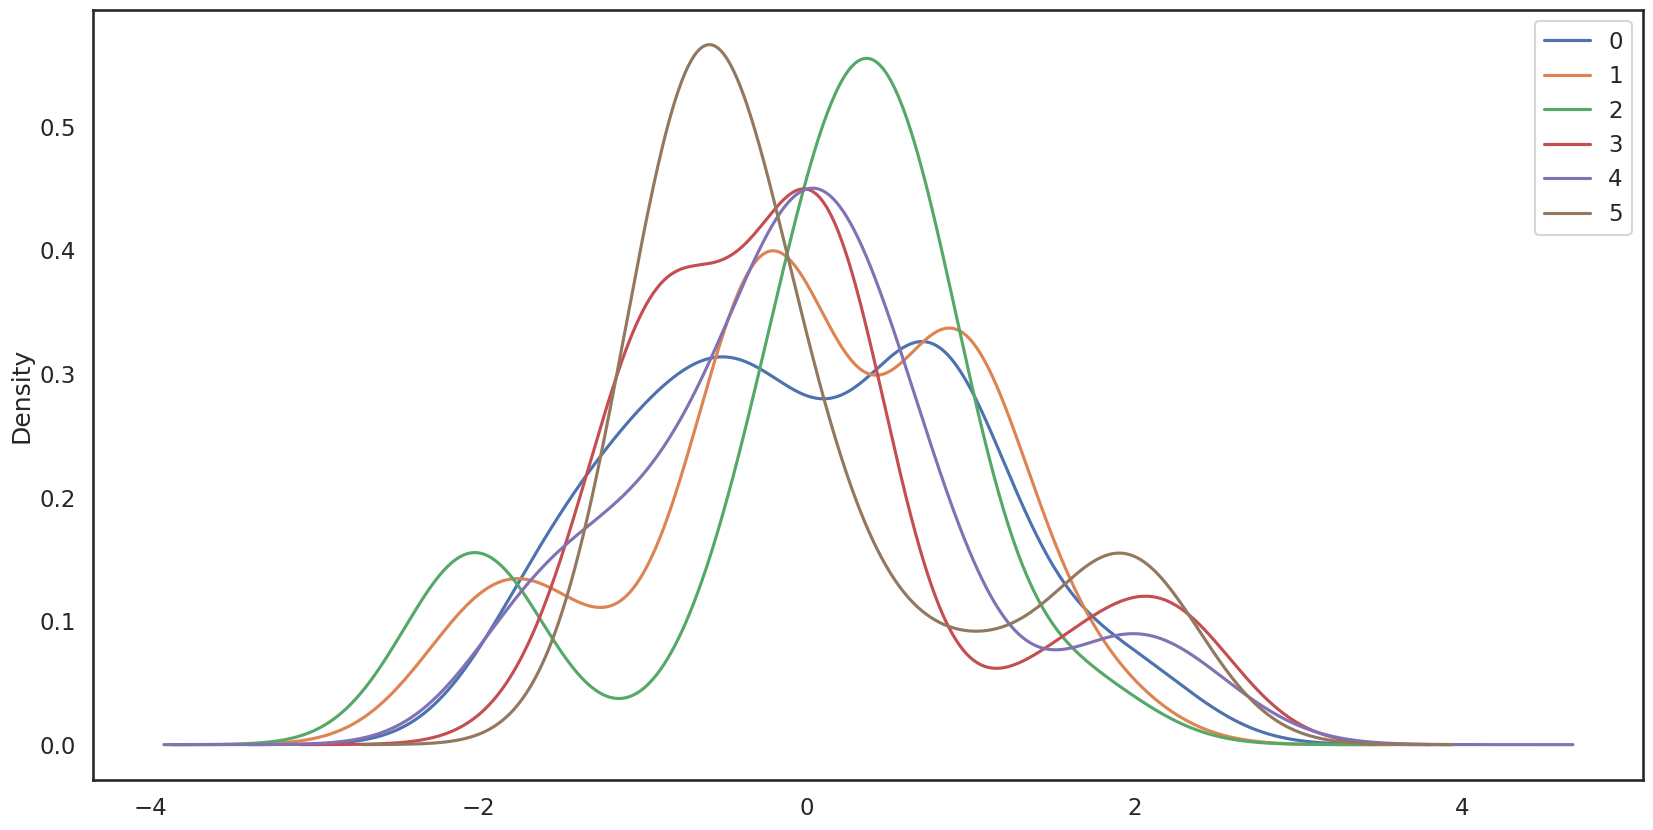

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
df_standart_1.plot(kind = 'kde', ax = ax)

## Строим модель

### Подготовим данные

In [ ]:
x = df[['IW', 'IF', 'VW', 'FP']].values # входные параметры
y = df[['Depth', 'Width']].values # выходные параметры

In [ ]:
x.shape, y.shape # проверим размерность параметров

((72, 4), (72, 2))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7) # Разобьем выборку на обучающую и тестовую

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # Проверим размерность

((57, 4), (15, 4), (57, 2), (15, 2))

### Линейная регрессия Linear Regression

##### Обучим модель линейной регресии

In [ ]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}

In [ ]:
lr = lr.fit(x_train, y_train)

###### Прогнозные значения

In [ ]:
y_lr = lr.predict(x_test)

In [ ]:
# выведем первые пять значений
print(y_lr[:5])
print('')
print(y_test[:5])

[[1.01695061 1.60476067]
 [1.59978116 2.49199331]
 [1.01695061 1.60476067]
 [1.22046771 1.78771556]
 [1.22046771 1.78771556]]

[[1.12 1.71]
 [1.68 2.6 ]
 [1.08 1.68]
 [1.2  1.72]
 [1.24 1.8 ]]


###### Рассчитаем ошибки

In [ ]:
print("Среднеквадратичная ошибка:", mean_squared_error(y_test, y_lr))
print("Средняя абсолютная ошибка:", mean_absolute_error(y_test, y_lr))
print("Коэффициент детерминации:", r2_score(y_test, y_lr))

Среднеквадратичная ошибка: 0.007538388060662002
Средняя абсолютная ошибка: 0.06785050140951457
Коэффициент детерминации: 0.831308671937018


#### Построим графики

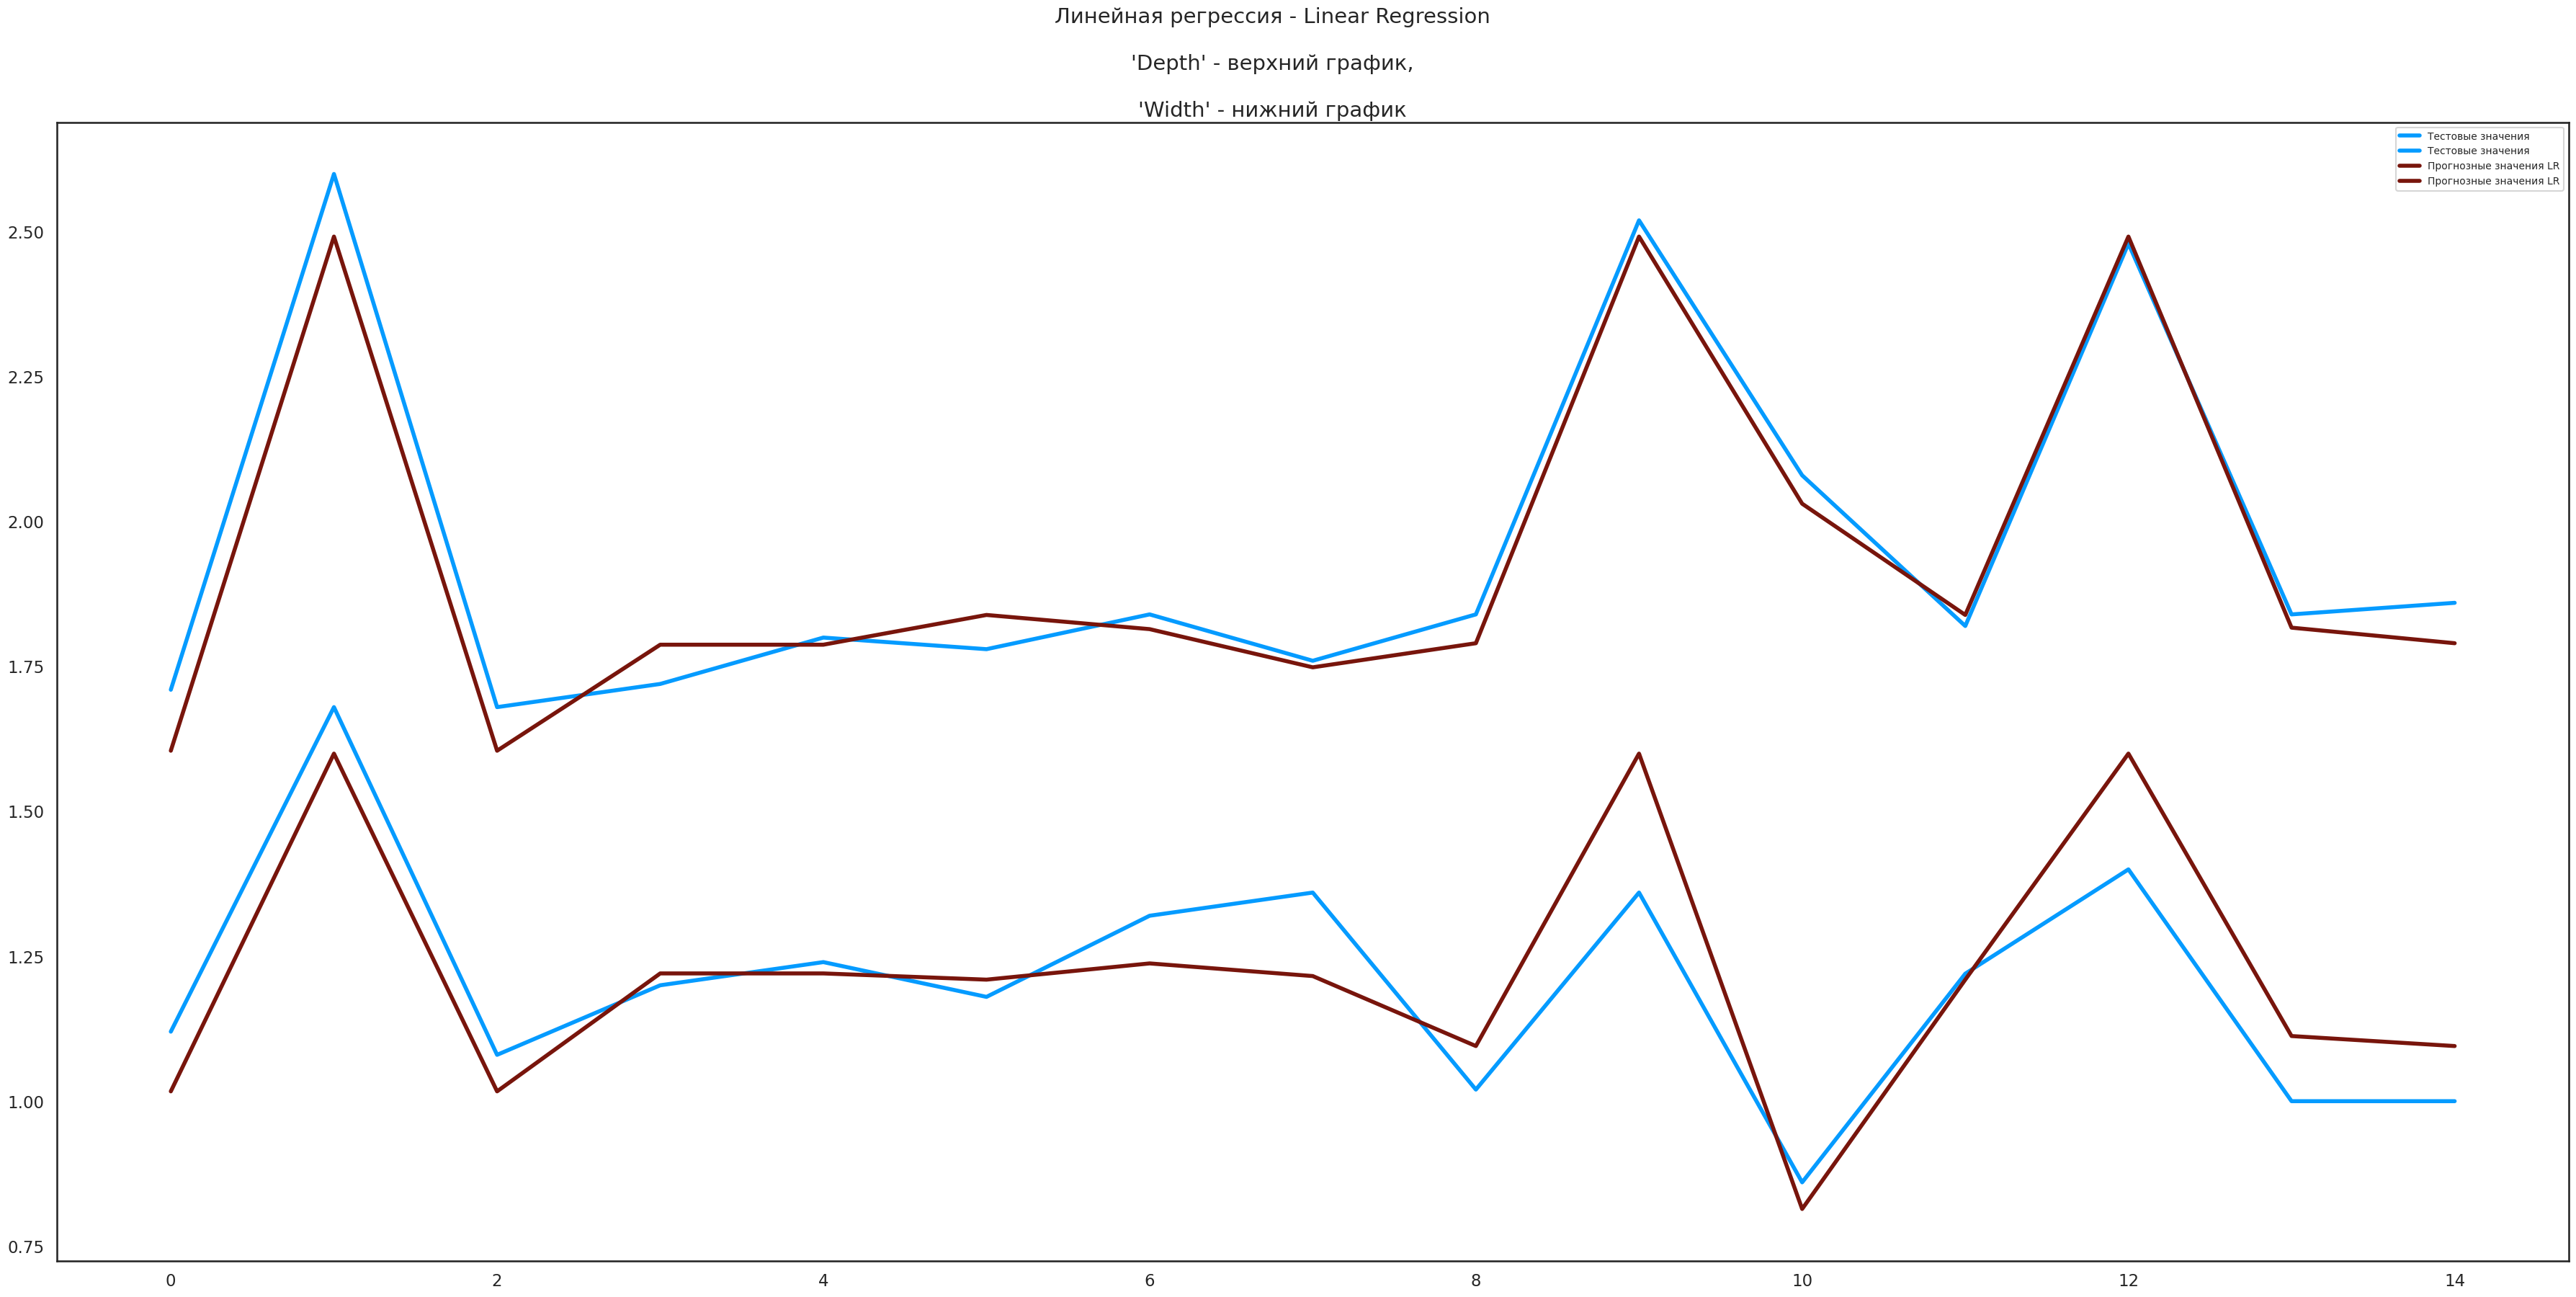

In [ ]:
plt.figure(figsize = (45, 20))
plt.suptitle("Линейная регрессия - Linear Regression\n\n'Depth' - верхний график,\n\n'Width' - нижний график", size = 21)
plt.subplots_adjust(top = 0.90)
plt.plot(range(len(y_test)), y_test, label = 'Тестовые значения', color = '#059bff', linewidth = 4)
plt.plot(range(len(lr.predict(x_test))), lr.predict(x_test), color = '#78150c', label = 'Прогнозные значения LR', linewidth = 4)
plt.legend(loc = 'best', fontsize = 10)

#### Сохраняем модель

In [ ]:
pickle.dump(lr, open('/content/drive/MyDrive/BMSTU/lr_model.pkl', 'wb'))

#### Выводы:

Чем ближе значение MSE к нулю, тем лучше модель предсказывает данные. Полученное значение MSE вполне низкое, что говорит о хорошей точности модели.

Меньшее значение MAE указывает на лучшую точность модели. Полученное значение MAE также низкое, что свидетельствует о хорошей точности модели.

Значение R-квадрат близкое к 1 указывает на то, что модель хорошо соответствует данным и хорошо объясняет их вариацию. Полученное значение коэффициента детерминации указывает на хорошую прогностическую способность модели.

В целом, модель линейной регрессии с такими показателями обладает хорошей точностью и способна хорошо объяснить вариации в данных.